In [47]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.dummy import DummyClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [5]:
mnist=fetch_openml('mnist_784',as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [6]:
X,y=mnist.data,mnist.target
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
def plt_image(image_data):
    image_array=image_data.reshape(28,28)
    plt.imshow(image_array,cmap='binary')

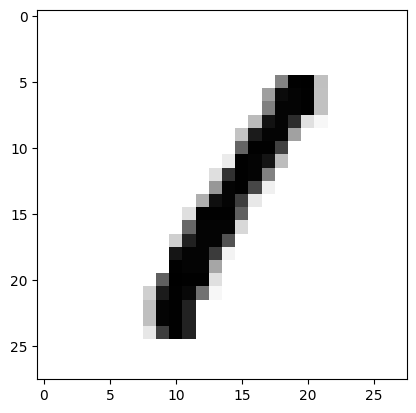

In [9]:
X1=X[3]
plt_image(X1)

always create a test set and put it aside before inspecting and cleaning

In [10]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
y_train.shape

(60000,)

In [12]:
y_train_5=(y_train=='5')
y_train_5

array([ True, False, False, ...,  True, False, False])

In [13]:
y_test_5=(y_test=='5')
y_test_5

array([False, False, False, ..., False,  True, False])

In [14]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [23]:
q=X_train[11]
answer=sgd_clf.predict([q])
answer

array([ True])

In [22]:
y_train_5[11]

np.True_

In [25]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [26]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring='precision')

array([0.69198013, 0.89922481, 0.78942652, 0.80925926, 0.65913758])

In [27]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring='recall')

array([0.89861751, 0.74907749, 0.81273063, 0.80627306, 0.88837638])

In [30]:
dummy_clf=DummyClassifier()
cross_val_score(dummy_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.90958333, 0.90966667, 0.90966667, 0.90966667, 0.90966667])

In [31]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=5,scoring='precision')

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nichu\.

array([0., 0., 0., 0., 0.])

here is good guide for eda and cleaning. eda - explorartory data analysis
you clean the column names drop a column or remove a row
then x and y split
and train test split
furhter all cleaning this is the way

cross eval score and cross eval predict
cross eval score returns a score
whereas predict returns a numpy array of predictions each value that is predicted wasnt on the ttrainign set. each ffold id cycled and each fold gets a chance of being the test set

plotting array
image_array=image_Data.reshape(28,28)
plt.imshow(image_array,cmap='binary')


In [43]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=2)

In [44]:
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[52484,  2095],
       [  681,  4740]])

its good at predicting whats not 5 bcoz of lots of training data that is not 5
false positive are type1
false negatives are type 2

on cv fold=8 for 2
precision score-0.78,0.69
recall - 0.79,0.87
TN-53427,52484
FP-1152,2095
FN-1088,681
TP-4333,4740

In [45]:
cm=precision_score(y_train_5,y_train_pred)
cm

0.6934893928310168

In [46]:
cm=recall_score(y_train_5,y_train_pred)
cm

0.874377421140011

In [48]:
cm=f1_score(y_train_5,y_train_pred)
cm

0.7734986945169713

my understanding of a classifier is this, there is an axis from -1 to 1
-1 being the model is confident its negative and 1 being positive
but how do u decide where the cutoff is where the positive starts from
that is where the threshold comes in
anything right of threshold the model claims is positive and left is negativve
by this way, if the threshold is very right. only highly confident answers go through
whereas if the threshold is quite low even mediumly confident answers go through
it has to predict something right